In [388]:
import pandas as pd
import numpy as np
from datetime import datetime
import time

import matplotlib.pyplot as plt
import seaborn as sns
from sys import getsizeof as get


In [389]:
#pd.show_versions()

In [390]:

M1 = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-01.csv", encoding = 'latin-1')
#M1 = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-02.csv", encoding = 'latin-1')
#M1 = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-03.csv", encoding = 'latin-1')
#M1 = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-04.csv", encoding = 'latin-1')
#M1 = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-05.csv", encoding = 'latin-1')
#M1 = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\yellow_tripdata_2018-06.csv", encoding = 'latin-1')




In [391]:
#size of our data frame
get(M1)

2840709010

In [392]:
print(M1.shape)

(8713831, 17)


In [393]:
M1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-06-01 00:15:40,2018-06-01 00:16:46,1,0.0,1,N,145,145,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30
1,1,2018-06-01 00:04:18,2018-06-01 00:09:18,1,1.0,1,N,230,161,1,5.5,0.5,0.5,1.35,0.0,0.3,8.15
2,1,2018-06-01 00:14:39,2018-06-01 00:29:46,1,3.3,1,N,100,263,2,13.0,0.5,0.5,0.00,0.0,0.3,14.30
3,1,2018-06-01 00:51:25,2018-06-01 00:51:29,3,0.0,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80
4,1,2018-06-01 00:55:06,2018-06-01 00:55:10,1,0.0,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80


In [394]:
M1.describe()


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,8.713831e+06,8.713831e+06,8.713831e+06,8.713831e+06,8.713831e+06,8.713831e+06,8.713831e+06,8.713831e+06,8.713831e+06,8.713831e+06,8.713831e+06,8.713831e+06,8.713831e+06,8.713831e+06
mean,1.575645e+00,1.597527e+00,3.008475e+00,1.045928e+00,1.624701e+02,1.607770e+02,1.314139e+00,1.325420e+01,3.363939e-01,4.970961e-01,1.906177e+00,3.631078e-01,2.995292e-01,1.666019e+01
std,4.950090e-01,1.243872e+00,3.858110e+00,5.161131e-01,6.676301e+01,7.046724e+01,4.854247e-01,1.214530e+01,4.658805e-01,4.213728e-02,2.664580e+00,1.807575e+00,1.613463e-02,1.491407e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.000000e+02,-5.000000e+00,-5.000000e-01,-1.000000e+02,-2.702000e+01,-3.000000e-01,-3.332500e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.750000e+00
50%,2.000000e+00,1.000000e+00,1.660000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.450000e+00,0.000000e+00,3.000000e-01,1.200000e+01
75%,2.000000e+00,2.000000e+00,3.100000e+00,1.000000e+00,2.330000e+02,2.330000e+02,2.000000e+00,1.500000e+01,5.000000e-01,5.000000e-01,2.460000e+00,0.000000e+00,3.000000e-01,1.830000e+01
max,4.000000e+00,9.000000e+00,8.331000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,8.018800e+03,5.300000e+00,6.300000e+00,4.115000e+02,9.105000e+02,1.000000e+00,8.019600e+03


In [395]:
M1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8713831 entries, 0 to 8713830
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.1+ GB


In [396]:
# ANY NAN VALUES IN THE MONTH OF JANUARY?


#is there any NaN (not a number) values in the dataframe?
#Returns a dataframe of boolena values (true/false)
#M1.isnull()

#Now find only those columns which have NaN values
#M1.isnull().any()

#one more any() will tell us if any of the above is true?
M1.isnull().any().any()


False

In [397]:
#another way to see if our dataframe has any NaN vales
M1.isnull().values.any()


False

# RQ1

In [398]:
#The pickup boroughs are taken into consideration
#to answer this question, we need two columns. So, we drop the others. 
#keep tpep_pickup_datetime, PULocationID,

#dropping vs keeping the ones I need?
#df.drop(columns=['', 'C'])
M2 = M1.filter(['tpep_pickup_datetime', 'PULocationID'])
#free the memory from this big object M1 is! 
del M1


In [399]:
M2.head(2)

,tpep_pickup_datetime,PULocationID
0,2018-06-01 00:15:40,145
1,2018-06-01 00:04:18,230


In [400]:
M2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8713831 entries, 0 to 8713830
Data columns (total 2 columns):
tpep_pickup_datetime    object
PULocationID            int64
dtypes: int64(1), object(1)
memory usage: 133.0+ MB


In [401]:
# we have two datetime objects. Let's convert them into usable data columns:  day, hour, minutes,..

#M2["hour"] = [t.hour for t in pd.DatetimeIndex(M2.datetime)]
#M2["day"] = [t.dayofweek for t in pd.DatetimeIndex(M2.datetime)]

M2['pickup_day'] = pd.DatetimeIndex(M2['tpep_pickup_datetime']).day
#M2['pickup_hour'] = pd.DatetimeIndex(M2['tpep_pickup_datetime']).hour

#M2['dropoff_day'] = pd.DatetimeIndex(M2['tpep_dropoff_datetime']).day
#M2['dropoff_hour'] = pd.DatetimeIndex(M2['tpep_dropoff_datetime']).hour


#M2['tpep_pickup-datetime'] = pd.to_datetime(M2['tpep_pickup_datetime'])
#M2.info()
#M2['Hour'] = M2['tpep_pickup_datetime'].apply(lambda time:time.hour)
#M2['Day'] = M2['tpep_pickup_datetime'].apply(lambda time: time.dayofweek)
#M2['Month'] = M2['tpep_pickup_datetime'].apply(lambda time: time.month)
#M2['year'] = M2['tpep_pickup_datetime'].apply(lambda time: time.year)


In [402]:
M2.head()

,tpep_pickup_datetime,PULocationID,pickup_day
0,2018-06-01 00:15:40,145,1
1,2018-06-01 00:04:18,230,1
2,2018-06-01 00:14:39,100,1
3,2018-06-01 00:51:25,145,1
4,2018-06-01 00:55:06,145,1


In [403]:
#Drop the columns we don't need anymore
M3 = M2.drop(columns = ['tpep_pickup_datetime'])

In [404]:
#Free up memory space 
del M2

In [405]:
M3.head()

,PULocationID,pickup_day
0,145,1
1,230,1
2,100,1
3,145,1
4,145,1


In [406]:
#concatenate(join/merge)M3 and taxi_zone_lookup dataframe

#read taxi_zone_lookup
borough = pd.read_csv(r"C:\Users\Egon\Desktop\Universita\ADM\homework2\dati\taxi_zone_lookup.csv", encoding = 'latin-1')

In [407]:
borough.head(5)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [408]:
borough.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
LocationID      265 non-null int64
Borough         265 non-null object
Zone            264 non-null object
service_zone    263 non-null object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [409]:
#the key column is LocationID in boroughs and (PULocationID or DOLocationID) in M3. They contain the same data: LocationIDs. 
#How to merge these two dataframes when two columns' keys are not in the same order?

result = pd.merge(M3,
                 borough[['LocationID', 'Borough']],
                 left_on='PULocationID',
                 right_on='LocationID',
                 how='inner' 
                 )
result.head()


,PULocationID,pickup_day,LocationID,Borough
0,145,1,145,Queens
1,145,1,145,Queens
2,145,1,145,Queens
3,145,1,145,Queens
4,145,1,145,Queens


In [410]:
print("M3 dimensions: {}".format(M3.shape))
print("borough dimensions: {}".format(borough.shape))
print("result dimension: {}".format(result.shape))



M3 dimensions: (8713831, 2)
borough dimensions: (265, 4)
result dimension: (8713831, 4)


In [411]:


M4 = result.drop(['LocationID'], 1)
M4.head()

,PULocationID,pickup_day,Borough
0,145,1,Queens
1,145,1,Queens
2,145,1,Queens
3,145,1,Queens
4,145,1,Queens


In [412]:
del result 

In [413]:
#now, we need to use groupby function. We need the average frequency of taxis used in each day and for each borough seperately. 
#first we group by based on our boroughs.

M4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8713831 entries, 0 to 8713830
Data columns (total 3 columns):
PULocationID    int64
pickup_day      int64
Borough         object
dtypes: int64(2), object(1)
memory usage: 265.9+ MB


In [414]:
M4.groupby(['Borough']).groups.keys()

dict_keys(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island', 'Unknown'])

In [422]:
s = M4.groupby('Borough')['pickup_day'].count()

In [423]:
#we create a list of averages of each borough
borAvgs=[]
for i in range (7):
    borAvgs.append(s[i]//31)
#we append to the list the cumulative value of New York city
NYAvgs=sum(borAvgs)
borAvgs.append(NYAvgs)

In [424]:
print(borAvgs)
print(NYAvgs)

[329, 3966, 21, 254155, 18540, 4, 4073, 281088]
281088


In [425]:
#we create a dataframe to store the analisy that we do for each month
columns=[]
index= ['Bronx','Brooklyn','EWR','Manhattan','queens','Staten Island','Unknow', 'NYC']
#df=pd.DataFrame(index=index, columns=columns) #we run this line only the first time in order to not to overwrite the data frame

In [426]:
df

,Jan,Feb,Mar,Apr,May
Bronx,238,211,333,336,350
Brooklyn,3233,3067,3965,3841,3961
EWR,18,16,21,22,24
Manhattan,256958,250576,276408,271896,269354
queens,16996,15629,18221,19236,19704
Staten Island,4,3,4,4,4
Unknow,5126,4432,5251,4840,4150
NYC,282573,273934,304203,300175,297547


In [427]:
#changing only the data.csv and this line we can repeat our analisy for each month and store the value in our dataframe

df['Jan']=borAvgs
#df['Feb']=borAvgs
#df['Mar']=borAvgs
#df['Apr']=borAvgs
#df['May']=borAvgs
#df['Jun']=borAvgs

In [428]:
df

,Jan,Feb,Mar,Apr,May,Jun
Bronx,238,211,333,336,350,329
Brooklyn,3233,3067,3965,3841,3961,3966
EWR,18,16,21,22,24,21
Manhattan,256958,250576,276408,271896,269354,254155
queens,16996,15629,18221,19236,19704,18540
Staten Island,4,3,4,4,4,4
Unknow,5126,4432,5251,4840,4150,4073
NYC,282573,273934,304203,300175,297547,281088


In [429]:
#we transpose the dataframe to get plot of the keys that we want (boroughs)

df_tra=df.T
df_tra

,Bronx,Brooklyn,EWR,Manhattan,queens,Staten Island,Unknow,NYC
Jan,238,3233,18,256958,16996,4,5126,282573
Feb,211,3067,16,250576,15629,3,4432,273934
Mar,333,3965,21,276408,18221,4,5251,304203
Apr,336,3841,22,271896,19236,4,4840,300175
May,350,3961,24,269354,19704,4,4150,297547
Jun,329,3966,21,254155,18540,4,4073,281088


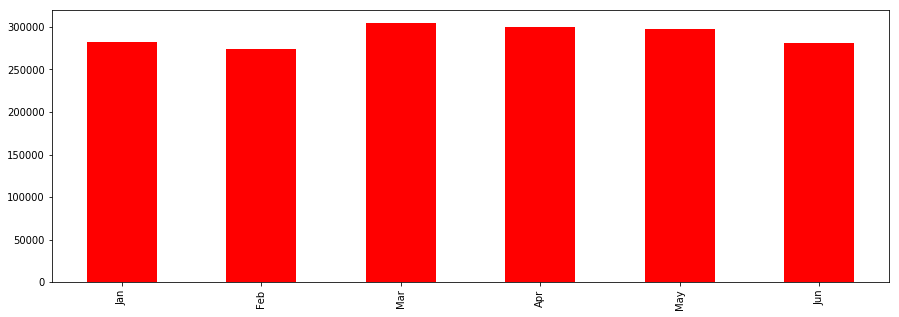

In [447]:
#we plot some graphs to get a good visualization of our problem
#graph of taxis taken in New York in each month
df_tra['NYC'].plot(kind='bar', figsize=(15,5), color='red')

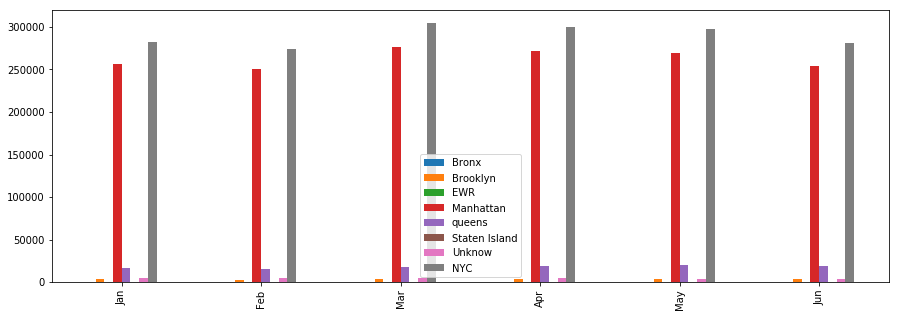

In [438]:
#graph of taxis taken in New York in each month in each borough
df_tra.plot(kind='bar', figsize=(15,5))

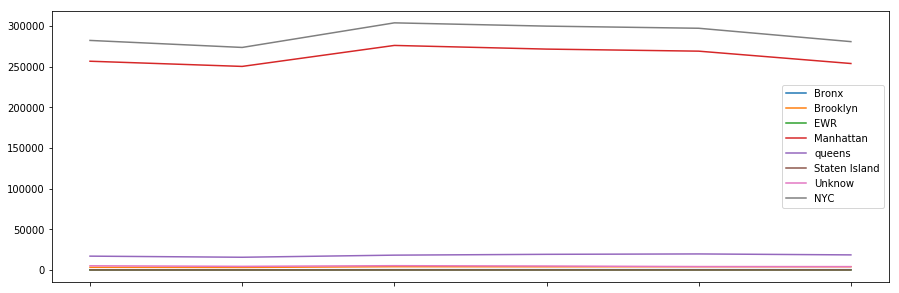

In [440]:
#another one
df_tra.plot(kind='line', figsize=(15,5))

In [450]:
df_tra2=df_tra.drop(columns = ['EWR', 'Manhattan','Unknow', 'NYC','queens', 'Brooklyn'])

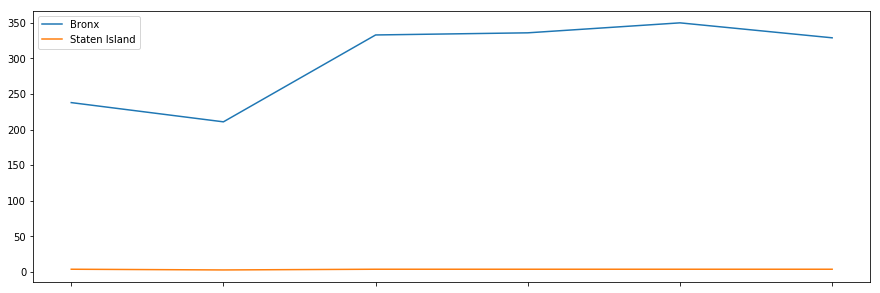

In [462]:
#delete big values to appreciate also pattern followed by boroughs with less data
df_tra2.plot(kind='line', figsize=(15,5))

### Observations
###### 1.As it's easy to see from our data frame and from our graphs, Manhattan has the highest trafic of taxis in each of six month compared to other boroughs. 
###### 2.Another thing observable, is that pick ups in colder months (January and, especially, Febraury) are less frequent. March is the month with the highest number of pick ups. If we look at each borough we see that they follows this pattern (even if it is not a huge rise and fall). Maybe the reason is that in the colder seasons there are less people in the streets so the quest for taxis is less.